In [ ]:
import pandas as pd

#### Convert column to datetime format

In [ ]:
df = pd.DataFrame({'a':['2019-01-01 14:13', '2019-02-01 14:13'],
                  'b':[1546351980, 1549030380]})
df

In [ ]:
df.dtypes

In [ ]:
df['a_asdate'] = pd.to_datetime(df['a'], format='%Y-%m-%d %H:%M')
df['b_asdate'] = pd.to_datetime(df['b'], unit='s')

In [ ]:
df

In [ ]:
df.dtypes

#### date manipulations

In [ ]:
df = pd.DataFrame({'dates':pd.date_range(start='1/1/2018', end='1/8/2018')})
df

In [ ]:
df.dtypes

In [ ]:
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month
df['day'] = df['dates'].dt.day
df['dayofweek'] = df['dates'].dt.dayofweek
df['weekday_name'] = df['dates'].dt.weekday_name
df['is_leap_year'] = df['dates'].dt.is_leap_year
# see more https://pandas.pydata.org/pandas-docs/version/0.21/api.html#datetimelike-properties

In [ ]:
df

#### Filtering

In [ ]:
df = pd.DataFrame({'a':[1,1,1,2,2,3,4,5],
                  'b':[10,10,11,20,0,0,40,50],
                  'c':['apple','apple','plum','pear','plum','apple','apple','apple']})
df

In [ ]:
df['a']<3

In [ ]:
df[df['a']<3]

In [ ]:
df[0:5]

In [ ]:
only_apple = df[df['c']=='apple']
only_apple

In [ ]:
df[(df['b']==10) & (df['c']=='apple')]

In [ ]:
df[df['a']<df['b']]

#### Grouping

In [ ]:
movies = pd.read_csv('movies.csv')
movies

In [ ]:
movies.groupby('title').size()

In [ ]:
movies.groupby('title').size().sort_values(ascending=False).head(10)

In [ ]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

In [ ]:
movies.groupby('title').agg({'rating':'mean',
                            'userId':'nunique'})

In [ ]:
ratings = movies.groupby('title').agg({'rating':'mean',
                            'userId':'nunique'}).rename(columns={'rating':'rating_mean',
                                                                'userId':'nb_rating'})

In [ ]:
ratings.sort_values('rating_mean', ascending=False).head()

In [ ]:
ratings[ratings['nb_rating']>50].sort_values('rating_mean', ascending=False).head()

#### Bar Plot

In [ ]:
%matplotlib inline

In [ ]:
ratings_by_genre = movies.groupby('genre')['rating'].mean()
ratings_by_genre

In [ ]:
ratings_by_genre.plot(kind='bar')

In [ ]:
ratings_by_genre.sort_values().plot(kind='bar')

In [ ]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre')

In [ ]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre', figsize=(14,4))

In [ ]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre', figsize=(14,4), color='lime')

In [ ]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre', figsize=(14,4), color='lime', ylim=[3,4])

#### Pivoting

In [ ]:
by_year_genre = movies.groupby(['year','genre'])['rating'].mean()

In [ ]:
by_year_genre.head()

In [ ]:
by_year_genre = movies.groupby(['year','genre'])['rating'].mean().reset_index()

In [ ]:
by_year_genre.head()

In [ ]:
by_year_genre.sort_values('year', inplace=True)

In [ ]:
by_year_genre

In [ ]:
pivoted_df = by_year_genre.pivot(index='year', columns='genre', values='rating')

In [ ]:
pivoted_df.head()

#### plotting groups

In [ ]:
pivoted_df.plot(kind='bar', figsize=(15,5), title='Average ratings by year of premiere and genre')

In [ ]:
pivoted_df.plot(kind='bar', 
                figsize=(15,5), 
                title='Average ratings by year of premiere and genre',
                ylim=[2,4],
               colormap='winter')

#### Figures with multiple plots

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
by_year_genre2 = movies.groupby(['year','genre'])['userId'].nunique().reset_index().sort_values('year')
by_year_genre2

In [ ]:
pivoted_df2 = by_year_genre2.pivot(index='year', columns='genre', values='userId')
pivoted_df2

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df.plot(kind='bar',  
                title='Average',
                colormap='winter',
                ax=axes[0]
                )
pivoted_df2.plot(kind='bar', 
                figsize=(15,5), 
                title='Number',
               colormap='summer',
               ax=axes[1])
plt.show()

In [ ]:
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[0,0]
                )
pivoted_df2[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Number',
               colormap='summer',
               ax=axes[0,1])
pivoted_df[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[1,0]
                )
pivoted_df2[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                figsize=(15,5), 
                title='Number',
               colormap='summer',
               ax=axes[1,1])
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[0,0]
                )
pivoted_df2[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Number',
               colormap='summer',
                legend=False,
               ax=axes[0,1])
pivoted_df[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                legend=False,
                ax=axes[1,0]
                )
pivoted_df2[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                figsize=(20,15), 
                title='Number',
               colormap='summer',
               ax=axes[1,1])
plt.show()

## Exercise

#### Find out if there is a difference between Subscriber/Customer in daily routine

### 1 - exercise

Load the trip_filled csv into a pandas dataframe. <br>
In the trip dataframe create a new column called 'start_datetime'. These should contain the values from column 'Start Date' converted into datetime. 

In [168]:
import pandas as pd

In [169]:
trip = pd.read_csv('trip_filled.csv')
trip.head(2)
print(trip.dtypes)



Trip ID               int64
Start Date           object
Start Station        object
Start Terminal        int64
End Date             object
End Station          object
End Terminal          int64
Bike #                int64
Subscription Type    object
dtype: object


In [170]:
trip = pd.read_csv('trip_filled.csv')
trip['start_date'] = pd.to_datetime(trip['Start Date'],format = '%m/%d/%Y %H:%M')
print(trip.head(2))

   Trip ID       Start Date             Start Station  Start Terminal  \
0     4576  8/29/2013 14:13  South Van Ness at Market              66   
1     4607  8/29/2013 14:42        San Jose City Hall              10   

          End Date               End Station  End Terminal  Bike #  \
0  8/29/2013 14:14  South Van Ness at Market            66     520   
1  8/29/2013 14:43        San Jose City Hall            10     661   

  Subscription Type          start_date  
0        Subscriber 2013-08-29 14:13:00  
1        Subscriber 2013-08-29 14:42:00  


### 1 - check yourself

In [171]:
if (trip['Start Date'] != trip['start_date'].dt.strftime('%#m/%#d/%Y %#H:%M')).sum() == 0:
    print('start_date column is successfully converted')
else:
    print('start_date column is NOT successfully converted')

start_date column is successfully converted


### 2 - exercise
Create new column called start_hour that contains the hour in which the trip started.

In [172]:
trip['start_hour'] = trip['start_date'].dt.hour
trip.head(2)

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,start_hour
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,14
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,14


### 2 - check yourself

In [173]:
if trip['start_hour'].dtype == 'int64' and trip['start_hour'].min()==0 and trip['start_hour'].max()==23:
    print('start_hour column is successfully converted')
else:
    print('start_hour column is NOT successfully converted')    

start_hour column is successfully converted


### 3 - exercise
First let's check if there is a daily pattern. Group the trip data by the start_hour column and get the size of each group. Assign it to a new variable called by_hour.

In [174]:
by_hour = trip.groupby('start_hour').size()
by_hour


start_hour
0       620
1       381
2       239
3       110
4       249
5       697
6      2847
7      7902
8     14984
9     12315
10     7260
11     7477
12     9575
13     8833
14     7536
15     8274
16    12446
17    15660
18    11061
19     6182
20     3806
21     2660
22     1789
23     1102
dtype: int64

### 3 - check yourself

In [175]:
if by_hour.index[0]==0 and by_hour[0] == 620:
    print('the grouping was successfull')
else:
    print('the grouping was NOT successfull')   

the grouping was successfull


### 4 - exercise
Make a bar plot from the by_hour data. 
- The x axis should be the hour and the y the number of trips. 
- The chart should have a title
- The chart should be 10 inches wide and 5 inches tall
- The color of the columns should set to something different from the default. (You can find named colors for example here: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)

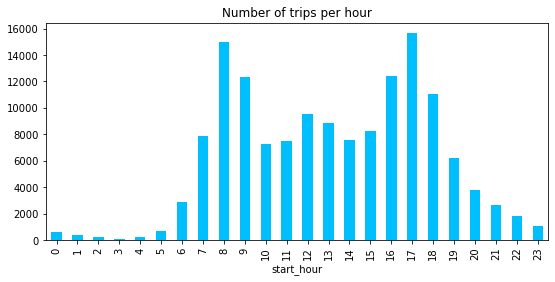

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline
by_hour.plot(kind = 'bar', title = "Number of trips per hour", color = "deepskyblue", figsize = (9,4))

### 4 - check yourself
Your chart should be similar to this:
<img src="exc4_cahrt.png">

### 5 - exercise
It looks like that the bikes are used most in the morning and in the afternoon. Let's check if this pattern is the same for Customers and Subscriebrs as well! <br>
Group the trip dataframe by Subscription Type ahd start_hour and get the size of each group. Reset the index and assign it to a new dataframe called by_type_hour. <br>
Rename the column with the group size to nb_trips.

In [177]:
by_type_hour = trip.groupby(['Subscription Type','start_hour']).size().reset_index().rename(columns = {0:'nb_trips'})
by_type_hour

,Subscription Type,start_hour,nb_trips
0,Customer,0,256
1,Customer,1,193
2,Customer,2,135
3,Customer,3,70
4,Customer,4,45
5,Customer,5,59
6,Customer,6,162
7,Customer,7,488
8,Customer,8,1059
9,Customer,9,1434


### 5 - check yourself

In [178]:
if by_type_hour.columns[2] == 'nb_trips' and len(by_type_hour) == 48:
    print('the grouping was successfull')
else:
    print('the grouping was NOT successfull')     

the grouping was successfull


### 6 - exercise
Pivot the by_type_hour dataframe. The pivoted dataframe should be called by_type_hour_pivot. The indeces should be the hours, the columns the subscription types (Customer and Subscriber) and the values the number of trips.

In [179]:
by_type_hour_pivot = by_type_hour.pivot(index = 'start_hour', columns = 'Subscription Type', values = 'nb_trips')
by_type_hour_pivot

Subscription Type,Customer,Subscriber
start_hour,,
0,256,364
1,193,188
2,135,104
3,70,40
4,45,204
5,59,638
6,162,2685
7,488,7414
8,1059,13925


### 6 - check yourself

In [180]:
if by_type_hour_pivot.columns.name == 'Subscription Type' and len(by_type_hour_pivot) == 24:
    print('the pivoting was successfull')
else:
    print('the pivoting was NOT successfull')      

the pivoting was successfull


### 7 - exercise

Make a bar plot from the by_type_hour_pivot data.

- The x axis should be the hour and the y the number of trips.
- The chart should have a title
- The chart should be 10 inches wide and 5 inches tall
- The Customer and the Subscriber bars should have different colors from one colormap other than the default. (You can find named colormaps for example here: https://matplotlib.org/tutorials/colors/colormaps.html)

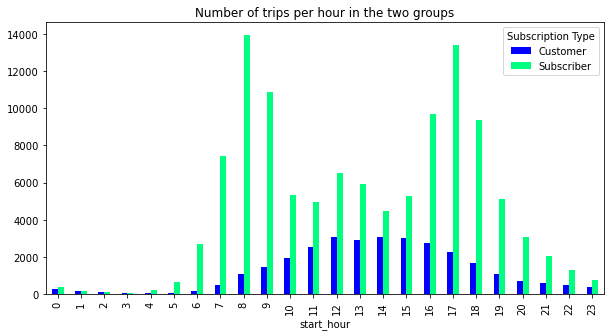

In [181]:
by_type_hour_pivot.plot(kind = 'bar', title = 'Number of trips per hour in the two groups', figsize = (10,5), colormap = "winter")

### 7 - check yourself
Your chart should be similar to this:
<img src="exc7_chart.png">

### 8 - exercise

Ok, it looks like that Subscribers use the bikes for commuting while Customers use the bikes more during the day. Let's see if these patterns are different in the weekend and on weekdays! <br>
As we are about to introduce a new grouping variable we can't use the aggregated data we created in the last tasks. So let's go back to the trip dataframe and create a new column called day_of_week with the name of the day of the start_date. Remember you can use the built-in methods of the .dt properties of the datetime like columns. 

In [182]:
trip['day_of_week'] = trip['start_date'].dt.day_name()
trip.head(5)


,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,start_hour,day_of_week
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,14,Thursday
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,14,Thursday
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,10,Thursday
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,11,Thursday
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,12,Thursday


### 8 - check yourself

In [183]:
if sorted(trip['day_of_week'].unique()) == ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']:
    print('the column creation was successfull')
else:
    print('the column creation was NOT successfull')      

the column creation was successfull


### 9 - exercise
We know the name of the days of each date now. Let's crate a column called weekend. If the name of the day is Saturday or Sunday, the value of weekend should be True. Otherwise it should be False.

In [184]:
trip['weekend'] = (trip['day_of_week'] == 'Saturday') | (trip['day_of_week'] == 'Sunday')
trip

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,start_hour,day_of_week,weekend
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,14,Thursday,False
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,14,Thursday,False
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,10,Thursday,False
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,11,Thursday,False
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,12,Thursday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144000,137130,12/28/2013 12:57,Embarcadero at Sansome,60,12/28/2013 13:31,Grant Avenue at Columbus Avenue,73,269,Customer,2013-12-28 12:57:00,12,Saturday,True
144001,137131,12/28/2013 12:57,Embarcadero at Sansome,60,12/28/2013 13:31,Grant Avenue at Columbus Avenue,73,574,Customer,2013-12-28 12:57:00,12,Saturday,True
144002,137132,12/28/2013 12:58,Powell Street BART,39,12/28/2013 13:06,2nd at Folsom,62,527,Subscriber,2013-12-28 12:58:00,12,Saturday,True
144003,137134,12/28/2013 12:58,2nd at Townsend,61,12/28/2013 13:01,San Francisco Caltrain 2 (330 Townsend),69,540,Subscriber,2013-12-28 12:58:00,12,Saturday,True


### 9 - check yourself

In [185]:
if trip['weekend'].sum() == 22980:
    print('the column creation was successfull')
else:
    print('the column creation was NOT successfull')        

the column creation was successfull


### 10 - exercise
Create a figure with two charts next to each others. 
- One should show the number of trips by hours for Customers and Subsribers on the weekends and the other on the weekdays. 
- Both charts should have a title and they should have a shared y axes. 
- There should be a shared title in the middle above the charts <br><br>
For creating the charts you have to filter the trip data for weekend/weekday first and than pivot the new dataframe. <br><br>
As an advanced task you can make a figure with 4 plots: in the first row the weekends and weekdays should be separate charts with differenc colored bars for Customers and Subscribers. In the second row, the columns should be for the weekends/weekdays on separate charts for Customers and Subscribers. The charts should share both axes and only the charts on the left should have the legend explanation box

In [186]:
weekend_df = trip[trip['weekend']== True]
weekend_df = weekend_df.groupby(['Subscription Type','start_hour']).size().reset_index().rename(columns = {0:'nb_trips'})
weekend_df = weekend_df.pivot(index = 'start_hour', columns = 'Subscription Type', values = 'nb_trips')

weekday_df = trip[trip['weekend']== False]
weekday_df = weekday_df.groupby(['Subscription Type','start_hour']).size().reset_index().rename(columns = {0:'nb_trips'})
weekday_df = weekday_df.pivot(index = 'start_hour', columns = 'Subscription Type', values = 'nb_trips')


In [187]:
# Advanced task
customers_df = trip[trip['Subscription Type']== 'Customer']
customers_df = customers_df.groupby(['weekend','start_hour']).size().reset_index().rename(columns = {0:'nb_trips'})
customers_df = customers_df.pivot(index = 'start_hour', columns = 'weekend', values = 'nb_trips')

subscribers_df = trip[trip['Subscription Type']== 'Subscriber']
subscribers_df= subscribers_df.groupby(['weekend','start_hour']).size().reset_index().rename(columns = {0:'nb_trips'})
subscribers_df = subscribers_df.pivot(index = 'start_hour', columns = 'weekend', values = 'nb_trips')

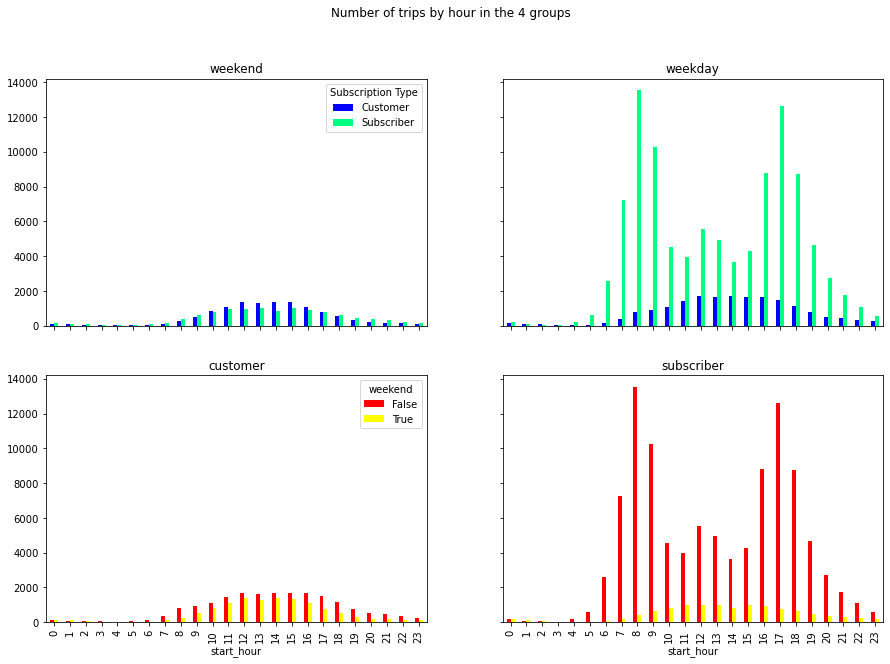

In [188]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= True, sharex = True)
fig.suptitle('Number of trips by hour in the 4 groups')

weekend_df.plot(kind = 'bar',
               title = 'weekend',
               colormap = 'winter',
                figsize = (15,10),
               ax = axes[0,0])

weekday_df.plot(kind = 'bar',
               title = 'weekday',
               colormap = 'winter',
               legend = False,
                figsize = (15,10),
               ax = axes[0,1])

customers_df.plot(kind = 'bar',
               title = 'customer',
               colormap = 'autumn',
                figsize = (15,10),
               ax = axes[1,0])

subscribers_df.plot(kind = 'bar',
               title = 'subscriber',
               colormap = 'autumn',
               legend = False,
                figsize = (15,10),
               ax = axes[1,1])

plt.show()

### 7 - check yourself
Your chart should be similar to this:
<img src="exc10_chart.png">
<br><br>Or to this if you chose the advanced task:
<img src="exc10_chart_advance.png">

### +1 - exercise
Include the month of the start_date in the analysis and create a figure showing some insight. <br>
Save the figure as a picture.

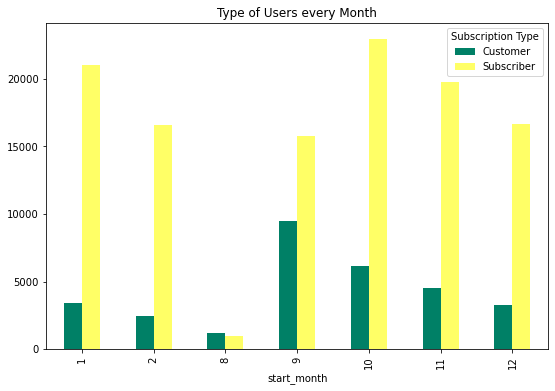

<Figure size 432x288 with 0 Axes>

In [198]:
trip['start_month'] = trip['start_date'].dt.month
by_month = trip.groupby('start_month').size()
by_type_month = trip.groupby(['Subscription Type','start_month']).size().reset_index().rename(columns = {0:'nb_trips'})
by_type_month_pivot = by_type_month.pivot(index = 'start_month' , columns = 'Subscription Type', values = 'nb_trips')

by_type_month_pivot.plot(kind = 'bar',
               title = 'Type of Users every Month',
               colormap = 'summer',
                figsize = (9,6))

plt.show()
plt.savefig('plusone_exercise.png')


The above chart shows the type of users per month. We can see that subscribers have used the service much more than the customers across the year. The only exception is the month of August when customers used the service slightly more than the subscribers.